# Nearest neighbour classifier

Here we will find the nearest point in our dataset to a given test point.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# load data from csv file
butterflies = pd.read_csv("data/butterflies.csv")

In [3]:
# create new test point
test_point = [3.2, 1.3]

In [4]:
# print test point values
print("Test Width: ", test_point[0])
print("Test Height: ", test_point[1])

Test Width:  3.2
Test Height:  1.3


In [5]:
# compute the distance from the test point to every example in the dataset

def compute_distance(point1, point2):
  return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)


distance = butterflies.apply(
    lambda row: compute_distance(test_point, [row["Width"], row["Height"]]),
    axis=1,
)

distance

0      2.109502
1      2.195450
2      2.024846
3      1.749286
4      2.059126
         ...   
97     2.236068
98     1.897367
99     2.118962
100    2.416609
101    1.964688
Length: 102, dtype: float64

In [6]:
# find the point in the dataset that is closes to the test point and record its distance
closest_point = butterflies.iloc[distance.argmin()]
distance_to_closest = distance.min()
print("Distance to closest point: ", distance_to_closest)

Distance to closest point:  0.28284271247461906


In [7]:
# assume the test point is the same class as the datapoint it is closest to
predicted_species = closest_point["Species"]
print("Predicted species: ", predicted_species)

Predicted species:  maniola jurtina


<AxesSubplot:xlabel='Width', ylabel='Height'>

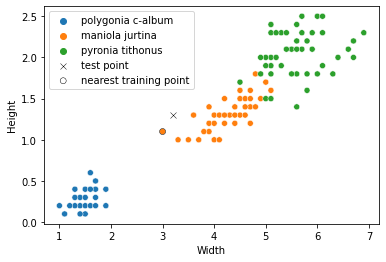

In [8]:
# plot training dataset
sns.scatterplot(
    data=butterflies,
    x="Width",
    y="Height",
    hue="Species",
)

# plot the test point as an 'x'
sns.scatterplot(
    x=[test_point[0]],
    y=[test_point[1]],
    marker="x", 
    label="test point",
    color="black",
)

# plot a ring around the nearest datapoint
sns.scatterplot(
    x=[closest_point["Width"]],
    y=[closest_point["Height"]],
    marker="o",
    label="nearest training point",
    edgecolor="black",
    facecolor="none",
)